# PLN - Modelo de processo de linguagêm natural

**Análise de sentimento tweets - Vacina AstraZeneca**

![title](imagens/002.jpg)

In [1]:
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.8.10


In [2]:
#Importação das bibliotecas

import nltk
import re
import wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
from wordcloud import WordCloud

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
# Verficações da versões das bibliotecas

%reload_ext watermark

%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

wordcloud : 1.8.1
pandas    : 1.2.4
nltk      : 3.6.2
seaborn   : 0.11.1
numpy     : 1.20.2
matplotlib: 3.3.4
re        : 2.2.1



In [5]:
# Configuração fundo dos gráficos e estilo, tamanho da fonte

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
color = sns.color_palette()

**Base de dados**

In [6]:
df = pd.read_csv("Vaccine Tweets-AstraZeneca.csv")
df

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
0,0,"Respiratory syncytial virus, or RSV, is a comm...",0.500000,-0.300000,Negative
1,1,"As pioneers in asthma, we continue to push the...",0.000000,0.000000,Neutral
2,2,It takes innovation to transform healthcare ex...,0.000000,0.000000,Neutral
3,3,Every day billions of people are trying to bal...,0.000000,0.000000,Neutral
4,4,An estimated 37 million people live with chron...,0.500000,0.136364,Positive
...,...,...,...,...,...
3144,3144,Good morning ERSCongress! Find out more about ...,0.550000,0.687500,Positive
3145,3145,"Morning everyone, here's to another great day ...",0.750000,1.000000,Positive
3146,3146,The value of social media to is in having an ...,0.066667,0.033333,Positive
3147,3147,I'm a patient advocate and a new member. Than...,0.551515,0.278788,Positive


In [7]:
# Exebindo o 5 primeiro dados 

df.head(5)

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
0,0,"Respiratory syncytial virus, or RSV, is a comm...",0.5,-0.300000,Negative
1,1,"As pioneers in asthma, we continue to push the...",0.0,0.000000,Neutral
2,2,It takes innovation to transform healthcare ex...,0.0,0.000000,Neutral
3,3,Every day billions of people are trying to bal...,0.0,0.000000,Neutral
4,4,An estimated 37 million people live with chron...,0.5,0.136364,Positive


In [8]:
# Exebindo o 5 últimos dados

df.tail(5)

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
3144,3144,Good morning ERSCongress! Find out more about ...,0.550000,0.687500,Positive
3145,3145,"Morning everyone, here's to another great day ...",0.750000,1.000000,Positive
3146,3146,The value of social media to is in having an ...,0.066667,0.033333,Positive
3147,3147,I'm a patient advocate and a new member. Than...,0.551515,0.278788,Positive
3148,3148,SevereAsthma is a heterogeneous disease charac...,0.000000,0.000000,Neutral


# Data exploration

In [9]:
# Número de linhas e colunas 

df.shape

(3149, 5)

In [10]:
# Exibido os tipos de dados

df.dtypes

Unnamed: 0        int64
Tweet            object
Subjectivity    float64
Polarity        float64
Score            object
dtype: object

In [11]:
# Informando as informações e das variaveis 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3149 non-null   int64  
 1   Tweet         3149 non-null   object 
 2   Subjectivity  3149 non-null   float64
 3   Polarity      3149 non-null   float64
 4   Score         3149 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 123.1+ KB


In [12]:
# Total de colunas e linhas 

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 3149
Columns: 5


In [13]:
# Exibindo valores ausentes e Valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 Unnamed: 0      3149
Tweet           3117
Subjectivity     336
Polarity         354
Score              3
dtype: int64


In [14]:
# Polaridade do coluna 

df.Polarity

0      -0.300000
1       0.000000
2       0.000000
3       0.000000
4       0.136364
          ...   
3144    0.687500
3145    1.000000
3146    0.033333
3147    0.278788
3148    0.000000
Name: Polarity, Length: 3149, dtype: float64

In [15]:
# Contando números de dados

df.Polarity.value_counts()

0.000000    1260
0.500000     194
0.250000     131
0.136364      88
0.100000      80
            ... 
0.013333       1
0.933333       1
0.404167       1
0.089744       1
0.187778       1
Name: Polarity, Length: 354, dtype: int64

In [16]:
# Total de número duplicados

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3144    False
3145    False
3146    False
3147    False
3148    False
Length: 3149, dtype: bool

In [17]:
# var() - Retorna a variação imparcial

df.var()

Unnamed: 0      826612.500000
Subjectivity         0.103726
Polarity             0.062196
dtype: float64

In [18]:
# Contagem de dados da coluna account_length

df.groupby(['Subjectivity'])['Polarity'].count()

Subjectivity
0.000000    977
0.033333      2
0.041667      2
0.047619      1
0.050000      9
           ... 
0.933333      1
0.937500      2
0.950000     16
0.975000      1
1.000000    188
Name: Polarity, Length: 336, dtype: int64

In [19]:
# Renomeando as colunas do dataset

df.columns = ["Usuario",
              "Text",
              "Subjetividade",
              "Polaridade",
              "Sentimento"]
df.head()

,Usuario,Text,Subjetividade,Polaridade,Sentimento
0,0,"Respiratory syncytial virus, or RSV, is a comm...",0.5,-0.300000,Negative
1,1,"As pioneers in asthma, we continue to push the...",0.0,0.000000,Neutral
2,2,It takes innovation to transform healthcare ex...,0.0,0.000000,Neutral
3,3,Every day billions of people are trying to bal...,0.0,0.000000,Neutral
4,4,An estimated 37 million people live with chron...,0.5,0.136364,Positive


# Estatística descritiva

In [20]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,Usuario,Subjetividade,Polaridade
Usuario,1.000000,0.052181,0.124895
Subjetividade,0.052181,1.000000,0.526396
Polaridade,0.124895,0.526396,1.000000


In [21]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe()

,Usuario,Subjetividade,Polaridade
count,3149.000000,3149.000000,3149.000000
mean,1574.000000,0.368251,0.151255
std,909.182325,0.322065,0.249391
min,0.000000,0.000000,-1.000000
25%,787.000000,0.000000,0.000000
50%,1574.000000,0.383333,0.042857
75%,2361.000000,0.583333,0.285714
max,3148.000000,1.000000,1.000000


(3.5, -0.5)

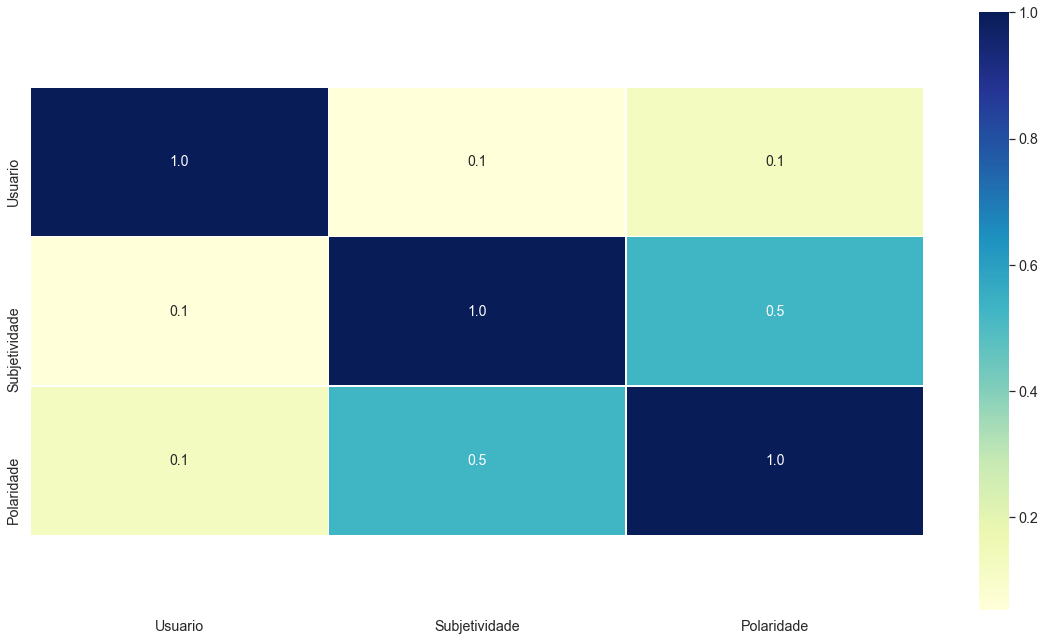

In [22]:
plt.figure(figsize=(20,11))

ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=.5, annot_kws={'size':14} ,fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

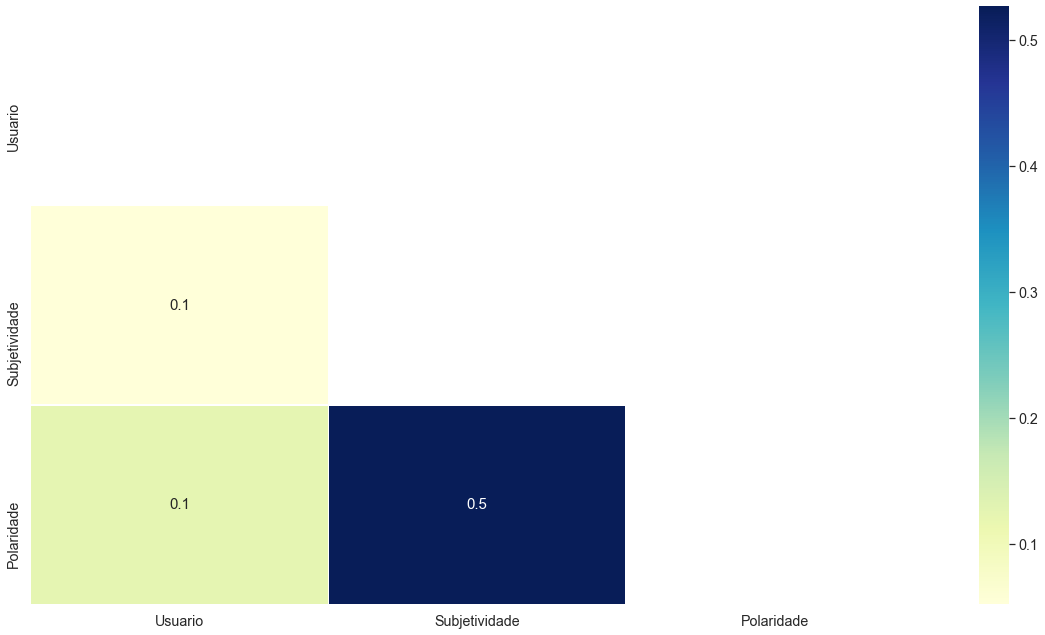

In [23]:
plt.figure(figsize=(20,11))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, cmap="YlGnBu", linewidths=.5, annot_kws={'size':15} ,fmt=".1f")
plt.show()

# Análise de dados

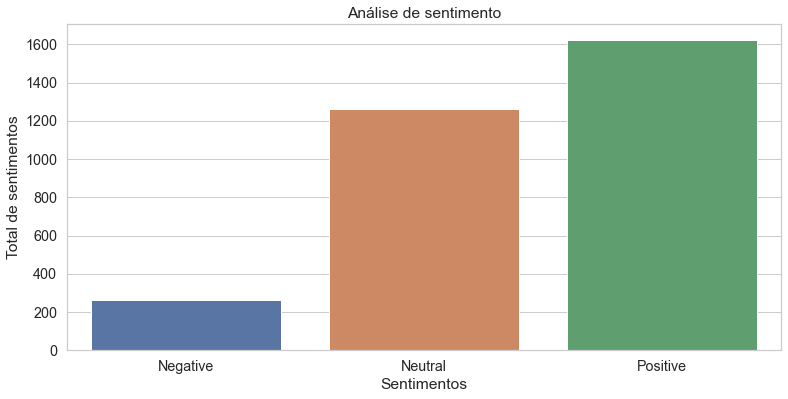

In [24]:
plt.figure(figsize=(12.8,6))

ax = sns.countplot(df["Sentimento"])
plt.title("Análise de sentimento")
plt.xlabel("Sentimentos")
plt.ylabel("Total de sentimentos")
plt.show()

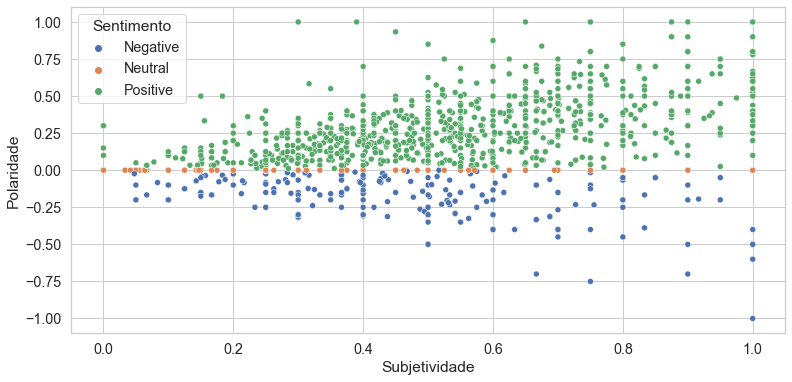

In [25]:
plt.figure(figsize=(12.8,6))

ax = sns.scatterplot(x="Subjetividade", y="Polaridade", data=df, hue="Sentimento")

Text(0.5, 1.0, 'Total de polaridade das frases')

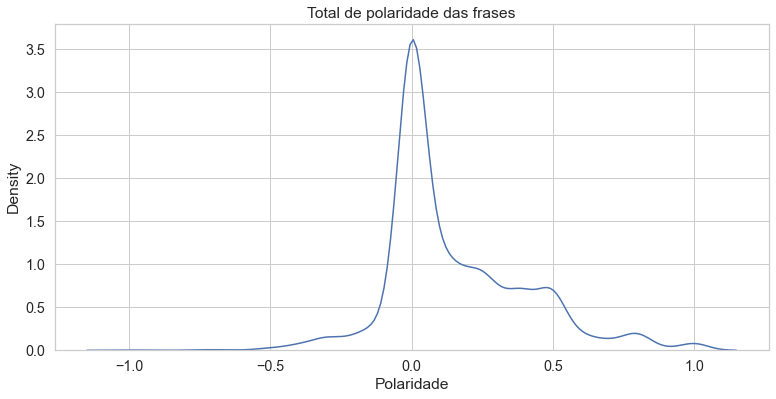

In [26]:
plt.figure(figsize=(12.8,6))

ax = sns.kdeplot(df["Polaridade"])
plt.title("Total de polaridade das frases")

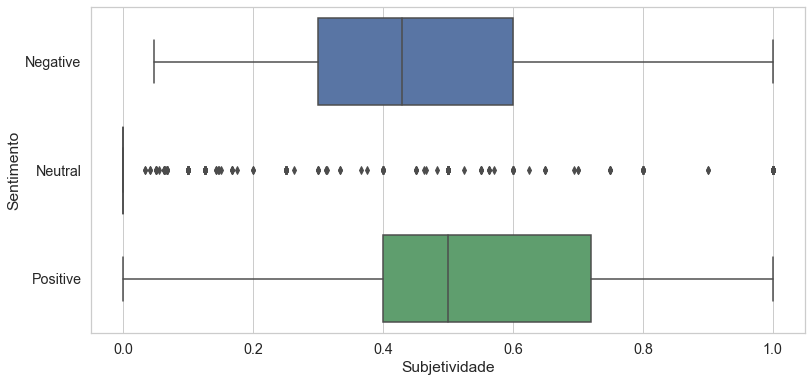

In [27]:
plt.figure(figsize=(12.8,6))

ax = sns.boxplot(x="Subjetividade", y="Sentimento", data = df)

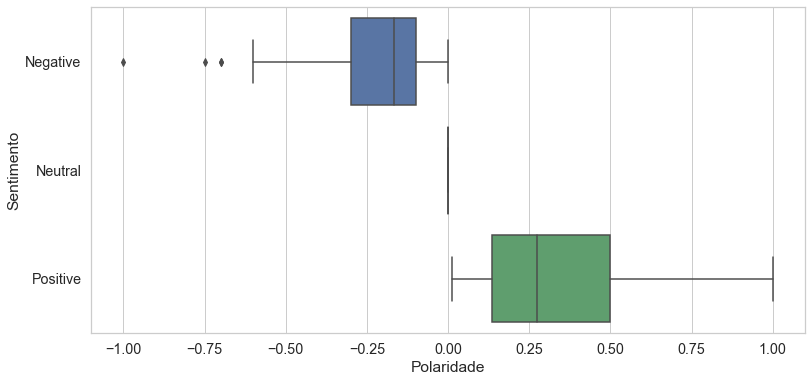

In [28]:
plt.figure(figsize=(12.8,6))

ax = sns.boxplot(x="Polaridade", y="Sentimento", data = df)

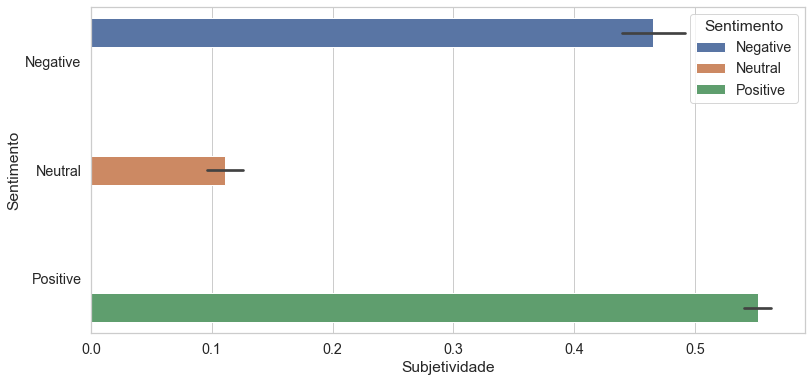

In [29]:
plt.figure(figsize=(12.8,6))

ax = sns.barplot(x="Subjetividade", y="Sentimento", data = df, hue="Sentimento")

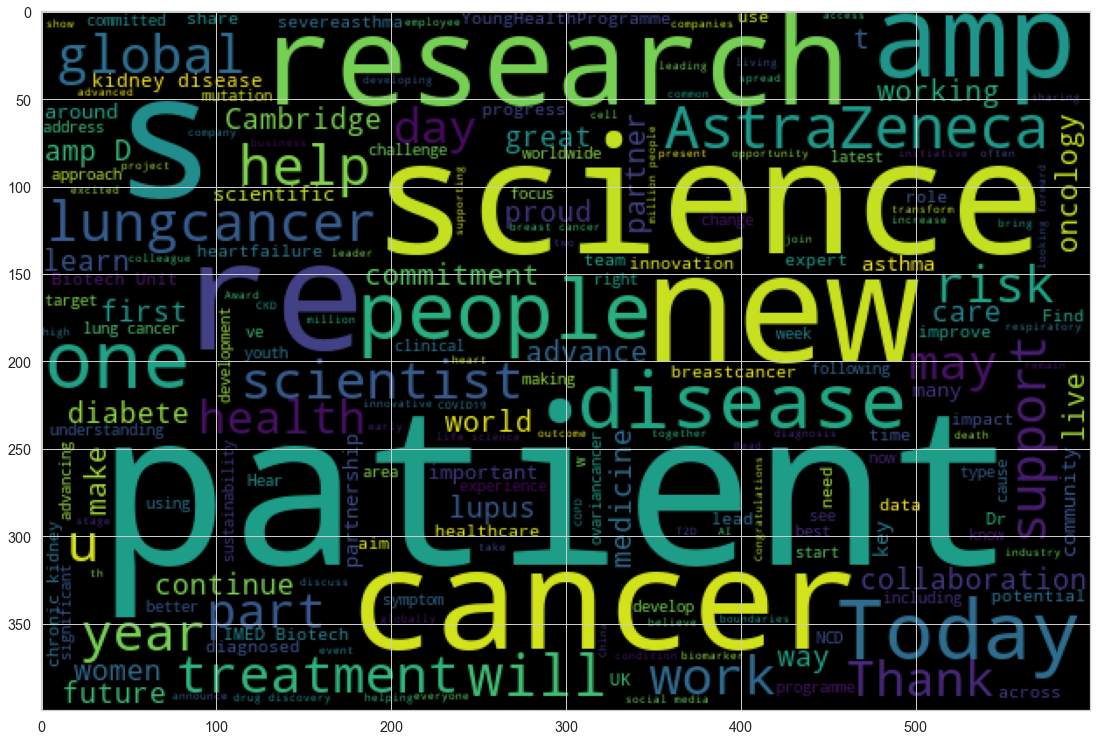

In [30]:
words = ' '.join([tweet for tweet in df['Text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.figure(figsize=(18.8, 16))
plt.imshow(wordCloud)
plt.show()

In [31]:
# Contagem de dados da coluna na Sentimento
df.Sentimento.count()

3149

In [32]:
# Contagem de dados da coluna na Subjetividade
df.Subjetividade.count()

3149

In [72]:
# Contagem de dados da coluna na Polaridade

df.Polaridade.count()

3117

In [34]:
# Contagem de dados da coluna na texto

df.Text.count()

3149

In [35]:
# Textos duplicados total

df.drop_duplicates(["Text"], inplace = True)
df.Text.count()

3117

# Treino teste

- Treino e teste da base de dados da colunas textos e sentimento

In [36]:
train = df["Text"]
test = df["Sentimento"]

In [37]:
# Total de linhas e colunas dados variável x

train.shape

(3117,)

In [38]:
# Total de linhas e colunas dados variável y

test.shape

(3117,)

**Remove stop words**: Removendo as stop words na base de dados

**Text stemming**: Palavras derivacionalmente relacionadas com significados semelhantes, palavras para retornar documentos que contenham outra palavra no conjunto.

**Dados limpos**: Limpeza na base de dados limpando dados de web com http e outros.

**Lemmatization**: Em linguística é o processo de agrupar as formas flexionadas de uma palavra para que possam ser analisadas como um único item, identificado pelo lema da palavra , ou forma de dicionário.

**Preprocessing**: Pré - processamento da base de dados que serão ser para análise de dados.

In [39]:
# Dados de limpeza para modelo PLN

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def remove_stop_words(instancia): # Removendo as stop words
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()

    palavras = []

    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

def dados_limpos(instancia): 
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

def Lemmatization(instancia):
    palavras = []
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [41]:
from nltk.tokenize import word_tokenize

text = "Passei no concurso"

toke = word_tokenize(text)
toke

['Passei', 'no', 'concurso']

In [42]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()
tweet_tokenizer.tokenize(text)

['Passei', 'no', 'concurso']

In [43]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

tokenizer = TweetTokenizer()
tokenizer.tokenize(text)

['Passei', 'no', 'concurso']

In [44]:
# Tokenização as palavras precisam ser codificadas como inteiros, 
# ou valores de ponto flutuante, para serem usadas como entradas para modelos machine learning.

from sklearn.feature_extraction.text import CountVectorizer

vet = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)
vet_train = vet.fit_transform(train)
vet_train.shape

(3117, 6350)

# Modelo 1 - Regressão logistica

In [45]:
# Modelo de regressão logistica 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_logistic = LogisticRegression()
model_logistic_fit = model_logistic.fit(vet_train, test)
model_logistic_scor = model_logistic.score(vet_train, test)

print("Model - Logistic Regression: %.2f" % (model_logistic_scor * 100))

Model - Logistic Regression: 99.94


In [46]:
# Previsão modelo com função log_proba de probabilidades das frases

model_logistic_prob = model_logistic.predict_log_proba(vet_train)
model_logistic_prob

array([[-0.24008494, -2.33013834, -2.15281546],
       [-4.53482919, -0.12512186, -2.23603087],
       [-4.34738905, -0.02129966, -4.8117189 ],
       ...,
       [-4.93707885, -3.9187053 , -0.0274147 ],
       [-5.10252321, -5.20777066, -0.01162253],
       [-2.79317028, -0.17100559, -2.34386198]])

In [47]:
# Previsão modelo com função predict de previsã das frases

model_logistic_pred = model_logistic.predict(vet_train)
model_logistic_pred

array(['Negative', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Neutral'], dtype=object)

In [48]:
# Acúracia do modelo de Regressão logistica

accuracy_regressao_logistica = metrics.accuracy_score(test, model_logistic_pred)
print("Accuracy model Regressão logistica: %.2f" % (accuracy_regressao_logistica * 100))

Accuracy model Regressão logistica: 99.94


In [49]:
from sklearn.metrics import confusion_matrix

matrix_1 = confusion_matrix(model_logistic_pred, test)
matrix_1

array([[ 261,    1,    0],
       [   0, 1248,    0],
       [   0,    1, 1606]], dtype=int64)

In [50]:
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline

def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

# Pipeline dos dados para modelo M.L sem acurácia 
model_reg_log = Pipeline([
    ('counts', CountVectorizer()),
    ('classifier', LogisticRegression())
])
model_reg_log.fit(train, test)

model_reg_log_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', LogisticRegression())
])
model_reg_log_simples.fit(train, test)

model_reg_log_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', LogisticRegression())
])
model_reg_log_negacoes.fit(train, test)

validacao_cruzada_Reg = cross_val_predict(model_reg_log, train, test)
accuracy = metrics.accuracy_score(test, validacao_cruzada_Reg)

print("Accuracy model Logistic Regression: %.2f" % (accuracy * 100))

Accuracy model Logistic Regression: 80.01


In [51]:
matrix_2 = confusion_matrix(validacao_cruzada_Reg, test)
matrix_2

array([[  82,   11,   13],
       [ 107, 1063,  244],
       [  72,  176, 1349]], dtype=int64)

In [52]:
# Regressão logistica - Modelo

sentimento=['Positivo',
            'Negativo',
            'Neutro']

print(pd.crosstab(test, validacao_cruzada_Reg, rownames = ["Real"], colnames=["Predito"], margins = True))

Predito   Negative  Neutral  Positive   All
Real                                       
Negative        82      107        72   261
Neutral         11     1063       176  1250
Positive        13      244      1349  1606
All            106     1414      1597  3117


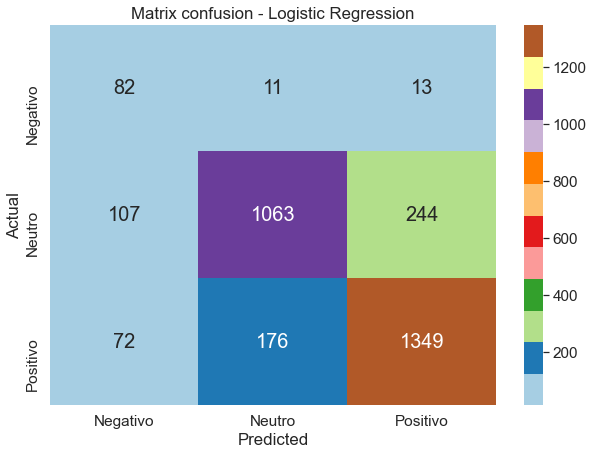

In [53]:
x = ["Negativo", "Neutro", "Positivo"]
y = ['Negativo', "Neutro", "Positivo"]

matrix = pd.DataFrame(matrix_2, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Logistic Regression")
matrix = sns.heatmap(matrix, cmap = 'Paired', annot=True, annot_kws = {"size": 20}, fmt = "")

In [55]:
# Modelo - Regressão logistica

def metricas_pipeline(model_logistic, train, test):
    validacao_cruzada_Reg = cross_val_predict(model_logistic, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada_Reg, test))

print("Model pipeline Simples:", metricas_pipeline(model_reg_log, train, test))
print("Model pipeline negações:", metricas_pipeline(model_reg_log_simples, train, test))
print("Model pipeline SVM simples:", metricas_pipeline(model_reg_log_negacoes, train, test))

Model pipeline Simples: Acurácia do modelo: 0.8042990054539622
Model pipeline negações: Acurácia do modelo: 0.8042990054539622
Model pipeline SVM simples: Acurácia do modelo: 0.5328841835097851


# Modelo 2 - Naive bayes

In [56]:
# Modelo machine learning - Naive bayes

from sklearn.naive_bayes import MultinomialNB

model_naive_bayes = MultinomialNB()
model_naive_bayes_fit = model_naive_bayes.fit(vet_train, test)
model_naive_bayes_scor = model_naive_bayes.score(vet_train, test)

print("Model - Naive Bayes: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive Bayes: 92.49


In [57]:
# Previsão modelo com função log_proba de probabilidades das frases

model_naive_bayes_prob = model_naive_bayes.predict_proba(vet_train).round(2)
print(model_naive_bayes_prob)

[[0.42 0.   0.58]
 [0.   0.73 0.27]
 [0.   0.99 0.01]
 ...
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.36 0.63 0.  ]]


In [58]:
# Previsão modelo com função predict de previsã das frases

model_naive_bayes_pred = model_naive_bayes.predict(vet_train)
model_naive_bayes_pred

array(['Positive', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Neutral'], dtype='<U8')

In [59]:
# Acúracia do modelo de Naive bayes
accuracy_naive_bayes = metrics.accuracy_score(test, model_naive_bayes_pred)

print("Accuracy model Naive bayes: %.2f" % (accuracy_naive_bayes * 100))

Accuracy model Naive bayes: 92.49


In [60]:
matrix_3 = confusion_matrix(model_naive_bayes_pred, test)
matrix_3

array([[ 154,    3,    3],
       [  47, 1161,   35],
       [  60,   86, 1568]], dtype=int64)

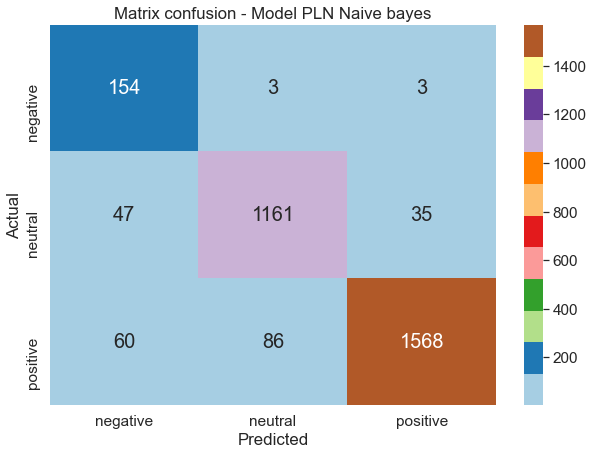

In [61]:
x = ["negative", "neutral", "positive"]
y = ['negative', "neutral", "positive"]

matrix = pd.DataFrame(matrix_3, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Model PLN Naive bayes")
matrix = sns.heatmap(matrix, cmap = 'Paired', annot=True, annot_kws = {"size": 20}, fmt = "")

In [62]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

model_pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])
model_pipeline_simples.fit(train, test)

model_pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])
model_pipeline_negacoes.fit(train, test)

model_pipeline_svm_simples = Pipeline([
    ("counts", CountVectorizer()),
    ("classifier", svm.SVC(kernel = "linear"))
])
model_pipeline_svm_simples.fit(train, test)

model_pipeline_svm_negacoes = Pipeline([
    ("counts", CountVectorizer(tokenizer = lambda text: marque_negacao(text))),
    ("classifier", svm.SVC(kernel = "linear"))
])
model_pipeline_svm_negacoes.fit(train, test)

validacao_cruzada = cross_val_predict(model_pipeline_simples, train, test)
accuracy = metrics.accuracy_score(test, validacao_cruzada)

print("Accuracy model Naive bayes: %.2f" % (accuracy * 100))

Accuracy model Naive bayes: 71.54


In [63]:
sentimento=['Positivo',
            'Negativo',
            'Neutro']

print(pd.crosstab(test, validacao_cruzada, rownames = ["Real"], colnames=["Predito"], margins = True))

Predito   Negative  Neutral  Positive   All
Real                                       
Negative        43       78       140   261
Neutral         10      753       487  1250
Positive        11      161      1434  1606
All             64      992      2061  3117


In [64]:
matrix_4 = confusion_matrix(validacao_cruzada, test)
matrix_4

array([[  43,   10,   11],
       [  78,  753,  161],
       [ 140,  487, 1434]], dtype=int64)

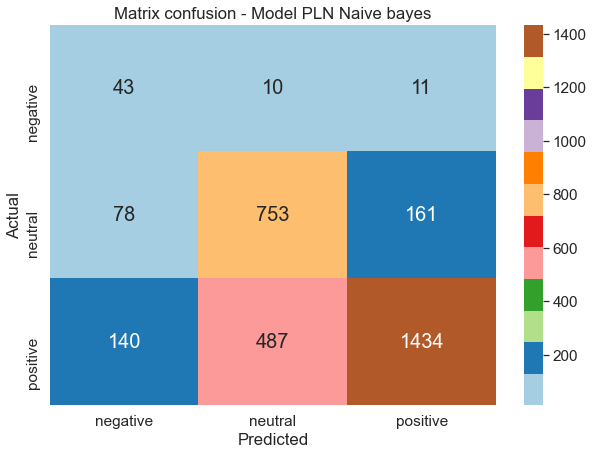

In [65]:
x = ["negative", "neutral", "positive"]
y = ['negative', "neutral", "positive"]

matrix = pd.DataFrame(matrix_4, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Model PLN Naive bayes")
matrix = sns.heatmap(matrix, cmap = 'Paired', annot=True, annot_kws = {"size": 20}, fmt = "")

In [66]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Regressão logistica", 
                "Naive Bayes"],

    "Acurácia" :[accuracy_regressao_logistica,
                 accuracy_naive_bayes]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Models,Acurácia
0,Regressão logistica,0.999358
1,Naive Bayes,0.924928


In [70]:
# Modelo - Naive Nayes
def metricas_pipeline(model_naive_bayes, train, test):
    validacao_cruzada = cross_val_predict(model_naive_bayes, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada, test))

print("Model pipeline Naive Bayes Simples:", metricas_pipeline(model_pipeline_simples, train, test))
print("Model pipeline Naive Bayes negações:", metricas_pipeline(model_pipeline_negacoes, train, test))
print("Model pipeline SVM simples:", metricas_pipeline(model_pipeline_svm_simples, train, test))
print("Model pipeline SVM negacoes:", metricas_pipeline(model_pipeline_svm_negacoes, train, test))

Model pipeline Naive Bayes Simples: Acurácia do modelo: 0.7025986525505293
Model pipeline Naive Bayes negações: Acurácia do modelo: 0.5104266923323709
Model pipeline SVM simples: Acurácia do modelo: 0.8164902149502727
Model pipeline SVM negacoes: Acurácia do modelo: 0.5255052935514918


In [71]:
## Salvando modelo M.L

import pickle
 
with open('model_logistic_pred.pkl', 'wb') as file:
    pickle.dump(model_logistic_pred, file)
    
with open('model_naive_bayes_pred.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes_pred, file)